# Import Library

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("TrainFiles"))

['20793864.jpg', '43036460.jpg', '88662413.jpg', '93265691.jpg', '82483168.jpg', '56790538.jpg', '5339582.jpg', '40518990.jpg', '48898485.jpg', '1293922.jpg', '8744992.jpg', '77634066.jpg', '29823737.jpg', '54057445.jpg', '43525827.jpg', '41356233.jpg', '74407150.jpg', '2326405.jpg', '45113234.jpg', '81721747.jpg', '91480559.jpg', '24690130.jpg', '25027788.jpg', '69646252.jpg', '61604643.jpg', '14514053.jpg', '2255399.jpg', '90922880.jpg', '16286661.jpg', '64298043.jpg', '40586376.jpg', '36236077.jpg', '16919793.jpg', '25687003.jpg', '87909774.jpg', '31961982.jpg', '24558096.jpg', '8925791.jpg', '2171297.jpg', '49936523.jpg', '44959118.jpg', '83204175.jpg', '96614327.jpg', '91504895.jpg', '2680021.jpg', '62909574.jpg', '56182401.jpg', '35470729.jpg', '53238937.jpg', '98782825.jpg', '13705633.jpg', '17811794.jpg', '79029918.jpg', '28063650.jpg', '606744.jpg', '17633104.jpg', '20390630.jpg', '11129937.jpg', '79498698.jpg', '61694244.jpg', '57523463.jpg', '20914490.jpg', '46157654.jpg', '

# Define Constants

In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Training data

In [4]:
df =pd.read_csv("Botanist_Training_Set.csv")
df

,FileName,Label
0,45945143,6
1,91233284,25
2,3082537,17
3,13822720,7
4,17579915,25
...,...,...
49995,17031696,25
49996,98945950,38
49997,93975072,4
49998,74665730,4


In [5]:
df = df.rename(columns={"FileName": "filename", "Label": "category"})
#Ans['EmployeeName'] = Ans[["FirstName","MiddleName","LastName"]].apply(lambda x: x.LastName+", "+x.FirstName+" "+str(x.MiddleName), axis=1)
df['filename'] = df[["filename"]].apply(lambda x: str(x.filename)+".jpg",axis=1)
df

,filename,category
0,45945143.jpg,6
1,91233284.jpg,25
2,3082537.jpg,17
3,13822720.jpg,7
4,17579915.jpg,25
...,...,...
49995,17031696.jpg,25
49996,98945950.jpg,38
49997,93975072.jpg,4
49998,74665730.jpg,4


<AxesSubplot:>

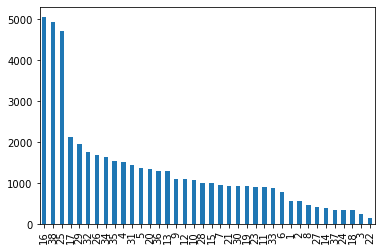

In [6]:
df['category'].value_counts().plot.bar()


# See Sample

In [8]:
filenames = os.listdir("../TrainFiles/TrainFiles")

sample = random.choice(filenames)
image = load_img("../TrainFiles/TrainFiles/"+sample)
plt.imshow(image)


FileNotFoundError: [Errno 2] No such file or directory: '../TrainFiles/TrainFiles'

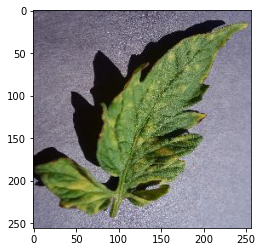

In [11]:
filenames = os.listdir("TrainFiles")

sample = random.choice(filenames)
image = load_img("TrainFiles/"+sample)
plt.imshow(image)

# Build Model

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax')) # 2 because we have 38 classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early Stop

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [14]:
earlystop = EarlyStopping(patience=10)

# Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data
Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.



In [17]:
df["category"] = df["category"].astype(str)


In [18]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

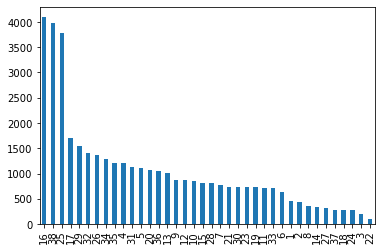

In [19]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

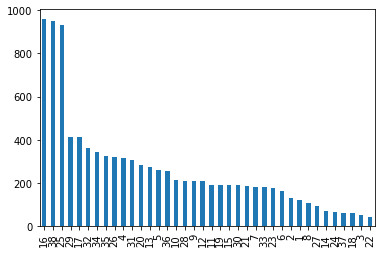

In [20]:
validate_df['category'].value_counts().plot.bar()

# batch_size

In [21]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "TrainFiles/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 40000 validated image filenames belonging to 38 classes.


# Validation Generator

In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "TrainFiles/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 10000 validated image filenames belonging to 38 classes.


See how our generator work

In [24]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "TrainFiles/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


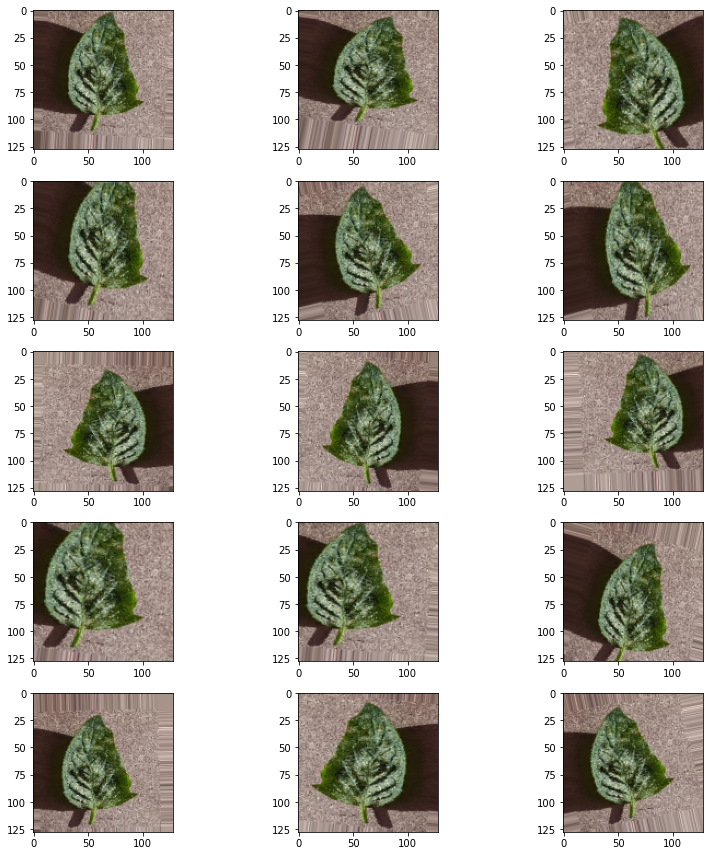

In [25]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [27]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
2666/2666 [==============================] - 727s 273ms/step - loss: 0.5496 - accuracy: 0.8359 - val_loss: 1.7053 - val_accuracy: 0.7076
Epoch 2/50
2666/2666 [==============================] - 748s 281ms/step - loss: 0.4628 - accuracy: 0.8614 - val_loss: 0.5250 - val_accuracy: 0.8439
Epoch 3/50
2666/2666 [==============================] - 753s 282ms/step - loss: 0.4179 - accuracy: 0.8751 - val_loss: 1.6989 - val_accuracy: 0.6909
Epoch 4/50
2666/2666 [==============================] - 723s 271ms/step - loss: 0.3863 - accuracy: 0.8835 - val_loss: 1.7919 - val_accuracy: 0.6660

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/50
2666/2666 [==============================] - 743s 279ms/step - loss: 0.2801 - accuracy: 0.9157 - val_loss: 0.7227 - val_accuracy: 0.8501
Epoch 6/50
2666/2666 [==============================] - 744s 279ms/step - loss: 0.2591 - accuracy: 0.9224 - val_loss: 0.5309 - val_accuracy: 0.8741
Epoch 7/50
2666/2666 [=========

# Save Model

In [28]:
model.save_weights("model.h5")

# Virtualize Training

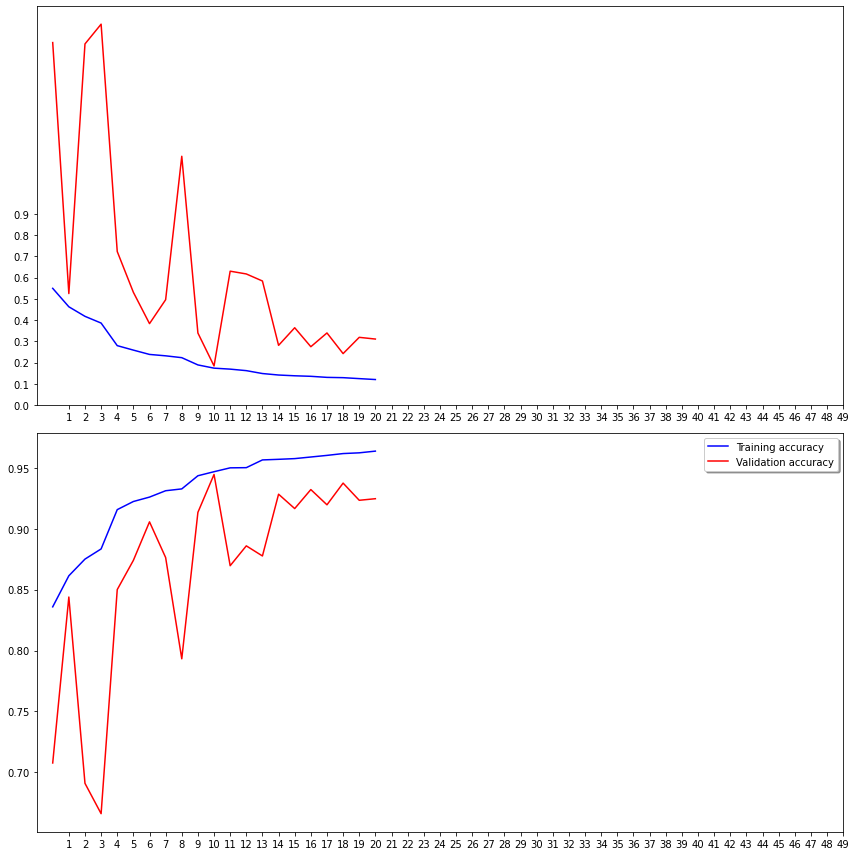

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [37]:
dft =pd.read_csv("Botanist_Test_Set.csv")
dft = dft.rename(columns={"FileName": "filename"})
#Ans['EmployeeName'] = Ans[["FirstName","MiddleName","LastName"]].apply(lambda x: x.LastName+", "+x.FirstName+" "+str(x.MiddleName), axis=1)
dft['filename'] = dft[["filename"]].apply(lambda x: str(x.filename)+".jpg",axis=1)
dft

,filename
0,64559325.jpg
1,52439467.jpg
2,1336013.jpg
3,77778059.jpg
4,28148617.jpg
...,...
3995,22452155.jpg
3996,12898627.jpg
3997,91162421.jpg
3998,22620517.jpg


# Create Testing Generator

In [39]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
  dft, 
    "TestFiles/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 4000 validated image filenames.


# Predict

In [40]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [41]:
dft['Label'] = np.argmax(predict, axis=-1)

In [42]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
dft['Label'] = dft['Label'].replace(label_map)

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [43]:
dft

,filename,Label
0,64559325.jpg,29
1,52439467.jpg,26
2,1336013.jpg,25
3,77778059.jpg,16
4,28148617.jpg,31
...,...,...
3995,22452155.jpg,32
3996,12898627.jpg,3
3997,91162421.jpg,28
3998,22620517.jpg,10


# Virtaulize Result

<AxesSubplot:>

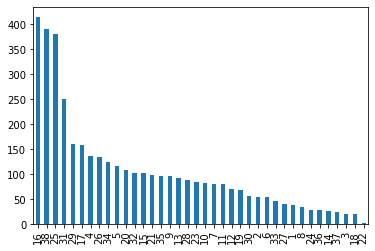

In [44]:
dft['Label'].value_counts().plot.bar()

# Submission

In [45]:
dft.to_csv('B.csv', index=False)